<h1>US police killing - Exploratory Data Analysis, visualizations, predictions and discussions
</h1>

#### Prepared By: Josh Koh
 

<h1>Introduction</h1> 

This document is written as part of my academic project -  It focuses primarily on data analysis and visualizations, with a simple random forest classifier based on the "police-killings.csv". The dataset consist of people who have died by being killed by a police officer in the United States. 


The content below will provide information based on my findings which will elaborate in each segment. Exploratory data analysis will first be conducted using concepts learnt; graphical and numerical summaries will be used. After initial analysis on the dataset, we will formulate my research questions and hypothesis based on the understanding on the dataset. Lastly, we will be discussing the overall findings with respect to the hypothesis and explore the possibility of revising it, before concluding the report with improvements.

In [1]:
#Import relevant packages and module required for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

#train_test_split
from sklearn.model_selection import train_test_split

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

#evaluation
from sklearn.metrics import accuracy_score,f1_score,recall_score,r2_score,confusion_matrix,classification_report

In [2]:
# read the cvs file
police_df = pd.read_csv("police-killings.csv")
police_df.head()

,id,name,date,manner-of-death,armed,age,gender,race,city,state,signs-of-mental-illness,threat-level,flee,body-camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Initial data exploration

We will be performing an initial data exploration on the police-killings-data.csv to gain a better understanding of the dataset. Basic in-built function will be used to identify key insights that might be useful for the subsequent analysis



In [3]:
#Use .info() to summarize and get a base understanding of the dataset
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner-of-death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs-of-mental-illness  2535 non-null   bool   
 11  threat-level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body-camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

.info() indicated a variety of missing values in columns such as: "armed", "age", "race", "flee". More actions will be done to explore the missing values and the most suitable way to impute the missing values.

In [4]:
# Use .describe() to get a numerical description of the dataset
police_df.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


.describe() shows only the numerical data, in this case "id" and "age." Since the unique id is not useful in this case for analysis, we can consider dropping it. This description also help us understand that majority of the columns contains object type, represented by strings. It provides an idea on the what type of model to use between a classification model or a regression model.

In [5]:
# Check the distribution of various attributes
print(police_df["manner-of-death"].value_counts())
print(police_df["armed"].value_counts())
print(police_df["gender"].value_counts())
print(police_df["race"].value_counts())
print(police_df["signs-of-mental-illness"].value_counts())
print(police_df["threat-level"].value_counts())
print(police_df["flee"].value_counts()) 
print(police_df["body-camera"].value_counts()) 

shot                2363
shot and Tasered     172
Name: manner-of-death, dtype: int64
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64
M    2428
F     107
Name: gender, dtype: int64
W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64
False    1902
True      633
Name: signs-of-mental-illness, dtype: int64
attack          1611
other            766
undetermined     158
Name: threat-level, dtype: int64
Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64
False    2264
True      271
Name: body-camera, dtype: int64


## Description of the dataset

In this section, I will be describing the police dataset (police-killings-data.csv), explaining the type and meaning of each data with context with all the information I have gathered during the exploratory data analysis. 

The datset consist of 2535 rows and 14 columns that contains information on the people who have died by being shot by police officers across all of the United States. 

### Id
The first column id shows the unique id of each row (deceased personnel). The ids are formatted in integers and ranges from 0 to 2822 which does not correspond to the number of rows in the dataset. However, it is unlikely that the unique id will be useful in the analysis, regardless if it is a classification or regression model.

### Name
The name of the deceased being killed by a police officer. Similar to the id, it is unlikely that the name will be useful in the analysis since we will be performing a regression or classification model

### Date
The date column can be ordinal, categorical or both. It depends on what these dates represent and what we are trying to answer with them with. In our case, I believe it is more suitable for categorical.

### Manner-of-death
Manner of death is a categorical nominal variables showing how the deceased was being killed. The values are stored as a object type, represented by strings. One of the reason for death is "shot and tasered", I would like to make a logic assumption that a person is tasered before getting shot at. I would like to dive deeper into why a person would be tasered.

### Armed 
This is a categorical nominal variables showing whether the deceased ws armed at the time of death. There are different types of weapons listed. There are 68 different weapons, ranging from gun to crowbar to pen. All of which could cause serious injuries or death. 

### Age
The age column is a numerical continuous variable that provides the age range for all the deceased in the dataset. It ranges from 6 to 91 years old. It is represented in float64 data type. There is flexibility in classifying the age into different range of categories for analysis if needed.

### Gender
This is a categorical nominal variable showing the sexual orientation of a deceased, represented by either M or F, stored as a string.

### Race
According to the offical website of the United States government (https://www.census.gov/quickfacts/fact/table/US/PST045221), the races can be described as the following below.
Since A can be either "Asians" or "American Indian and Alaska Native", I am going to make a reasonable assumption that  A in this case represent Asians.

w - White - A person having origins in any of the original peoples of Europe, the Middle East, or North Africa. It includes people who indicate their race as "White" or report entries such as Irish, German, Italian, Lebanese, Arab, Moroccan, or Caucasian.

B - Black or African American - A person having origins in any of the Black racial groups of Africa. It includes people who indicate their race as "Black or African American," or report entries such as African American, Kenyan, Nigerian, or Haitian.

H - Hispanic -Hispanics or Latino refers to a person of Cuban, Mexican, Puerto Rican, South or Central American, or other Spanish culture or origin regardless of race.

A - Asian

N - Native Hawaiian and Other Pacific Islander - A person having origins in any of the original peoples of Hawaii, Guam, Samoa, or other Pacific Islands. It includes people who reported their race as "Fijian," "Guamanian or Chamorro," "Marshallese," "Native Hawaiian," "Samoan," "Tongan," and "Other Pacific Islander" or provide other detailed Pacific Islander responses.


O - Others - respondents wrote how they identified themselves if different from the preceding categories 

### City and State
The city and state column is a tricky one. It could either be the city and state where the deceased lived, or the city and state he/she was killed. A fair assumption for this dataset would be the latter. 

### signs-of-mental-illness
This is a bool variable showing whether a deceased was mentally ill. It is represented by string values, True or False.

### threat-level 
This is a categorical nominal variable showing whether a deceased display hostile behaviors. It consist of 3 levels, which could help to determine if hostile behavior is a good factor for police to fire a shot. This will be a key attribute in the coming analysis.

### flee
This is an important attribute for analysing a person's behavior. The Flee column is a categorical nominal variable represented by strings, indicating if a deceased made an attempt to flee the crime scene or not. 


### body-camera
This is a categorical nominal variable showing whether a police officer is wearing a body camera. This may be important in understanding the thought process of a police officer, but unlikely to be useful in this analysis.

<h1>Research Hypothesis and questions</h1>

Preliminary data analysis has raised the questions as to which variables has the highest influence on the death rates of the people residing in the United States. According to **Statista**, approximately 1,055 people were shot by the police in the United States in 2021, an increasing number since 2017 (987 shot). Identifying the factors that determines the causes of death on the sample size of 2535 people in this dataset could lead to a better understanding towards the general population of citizens in the US. For example, if we can identify a group of people with specific demographics or a set of behaviors that led to deceased being shot by the police, more actions could be taken towards minimising the total death rate. Possible actions can range from policies to education to laws and regulations. The public can also be educated on how not to behave to prevent being shot by the police.

As there could be many different hypothesis based on the amount of information provided by the dataset, we will attempt to find a relationship between:
- The rate of being shot is related to the deceased behavior before being shot


Since we will be focusing on the bahaviors of the deceased before being shot, we will **not** be using columns such as id, name, date, city and state. As majority of the factors are not related to the bahaviors of the deceased. 

I hypothesize that a person would most likely be shot (not tasered and shot) by a police officer in the United States if he/she carries a weapon and exhibit hostile behaviors. I believe there is a high correlation between the former and latter, since it is reasonable to assume that demonstrating hostile bahaviors while carrying a weapon capable of killing is extremely dangerous to both the public and police officers. I expect a large number of people to be killed by a police officer if he/she displays hostile behavior and has a weapon. 


It will be interesting to see if these factors will contribute to the overall chances of being shot by a police officer in the United States.


<h2>Analytical questions to aid EDA</h2>
Here, we will formulate interesting questions to help with the in-depth exploratory data analysis. Answers to these questions may help to identify the direction of the analysis.
    
1. Is there a trend in the amount of people that were shot over a timeframe?

2. Is the cause of death attributed to discriminative reasons (i.e. race, gender)?

3. Are people getting killed because they display high level of threat?

4. Are people getting killed because they are trying to flee a crime scene?

5. Is there a correlation as to why some people are tasered and shot, whereas some are just shot?

6. Is armed weapon the main contributor as to why people got shot by the police?

# Thorough Exploratory Data Analysis (EDA)

We will be performing a more in-depth exploratory data analysis on the police-killings.csv to get from inaights from the dataset. Various methods such as graphical and numerical summaries will be used to explore the statistics and distribution of the variables.

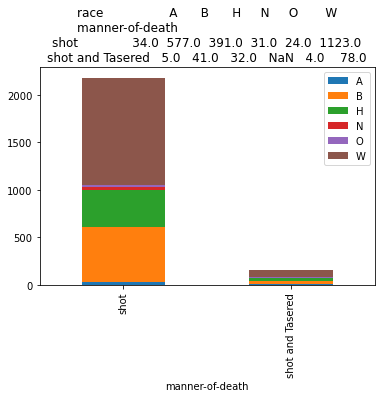

In [6]:
# Analyze the manner of death with respect to the race 
df_deathBivariate = police_df.groupby('manner-of-death')['race'].value_counts().unstack()


ax = df_deathBivariate.plot(kind='bar', stacked='True', title = str(df_deathBivariate.round(1)))
ax.legend(bbox_to_anchor=(1.0, 1.0))

Although the image is visually cluttered where some labels are hard to see, we could see a rough overview on the distribution of various races being shot at, or shot and tasered. This diagram shows that White, Black and Hispanic people are the majority of people being shot at. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


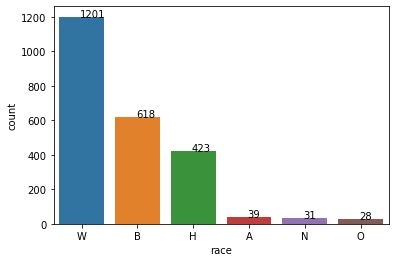

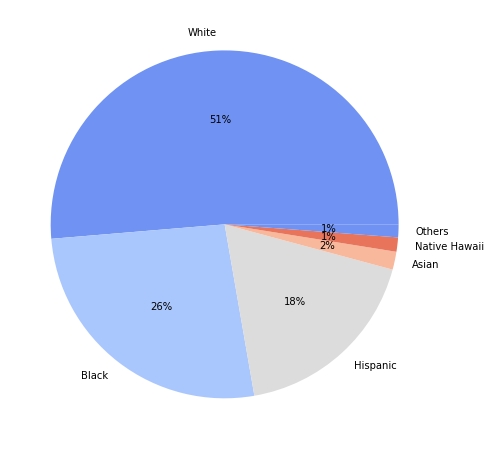

In [7]:
# plot the distribution of death by race
ax = sns.countplot(police_df["race"],order=police_df["race"].value_counts().index)
for p, label in zip(ax.patches, police_df["race"].value_counts()):
    ax.annotate(label, (p.get_x()+.375, p.get_height()+0.15))

    
plt.figure(figsize=(8,8))

plt.pie(police_df["race"].value_counts(),
       labels=["White","Black","Hispanic","Asian", "Native Hawaii", "Others"],
       autopct='%.0f%%',
       colors=sns.color_palette("coolwarm",5));

It is interesting that more white Americans are killed, as compared to Black American. This is surprising because of the publicised news on social media. For instance, high profile cases such as george floyd and movements such as black lives matter. However, although white Americans makes up 51% of total death, they make up 61.6% of the total population in 2020. While black American makes up 12.6% of the total population. In terms of percentage, black people seem more probable to be shot by police officers.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


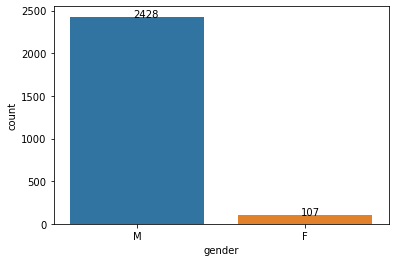

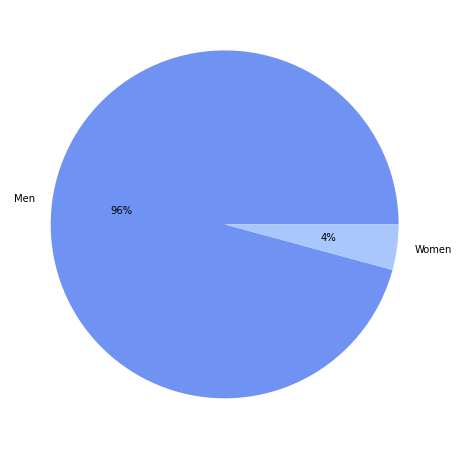

In [8]:
# Plot the gender distribution
ax = sns.countplot(police_df["gender"],order=police_df["gender"].value_counts().index)
for p, label in zip(ax.patches, police_df["gender"].value_counts()):
    ax.annotate(label, (p.get_x()+.375, p.get_height()+0.15))

    
plt.figure(figsize=(8,8))

plt.pie(police_df["gender"].value_counts(),
       labels=["Men","Women"],
       autopct='%.0f%%',
       colors=sns.color_palette("coolwarm",5));

This visualization shows a highly imbalanced proportion of distribution between men and women in this dataset. 96% of the people (2428) being shot by police officers are men, compared to 4% of women (107). This indicates that men are far more likely to be shot by a police officer. This could also lead to a deeper analysis on finding out whether these men are in possesion of armed weapons at the time of death.

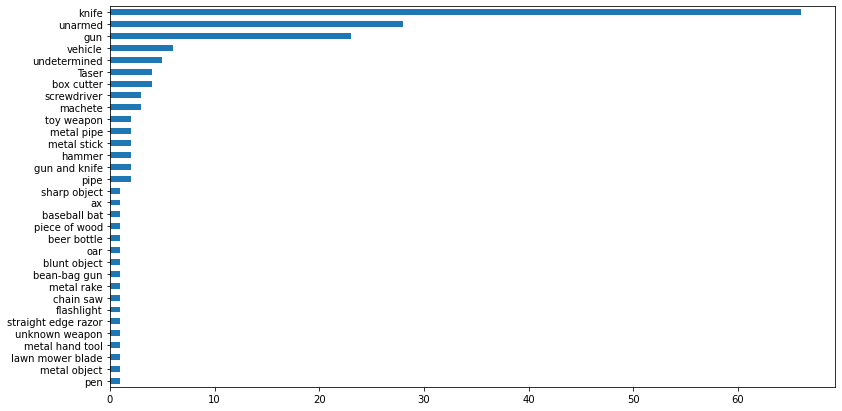

In [9]:
# Find a reason why a deceased is being tasered before getting shot
armed_and_tasered = police_df[police_df['manner-of-death']=="shot and Tasered"]['armed']

f, ax = plt.subplots(figsize=(13,7))
armed_and_tasered.value_counts().plot(kind="barh")
ax.invert_yaxis()

This graph explains one of the possible reason why a person would be tasered before getting shot. It is fairly reasonable that a person holding a knife would have to be physically close to a person in order to do harm. With that said, it is common for police officers to fire a taser gun at someone with the intention to do harm, before a person with a knife can get close to someone. A logical reason why gun is ranked 3rd is because an intuitive action when a person holds a gun would be to shoot him/her immediately, without the risk of the perpetrator retaliating. However, one reason why the deceased ended up dead could be that the taser gun is not enough to stop the violent behavior or act.

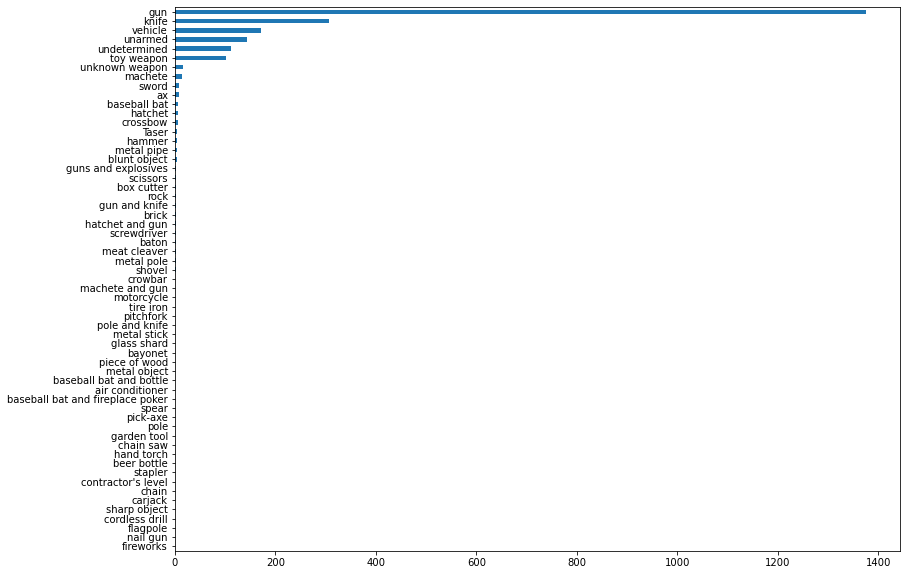

In [10]:
# Find out the main reason why a person is shot
armed_and_tasered = police_df[police_df['manner-of-death']=="shot"]['armed']

f, ax = plt.subplots(figsize=(13,10))
armed_and_tasered.value_counts().plot(kind="barh")
ax.invert_yaxis()

As expected, indeed a person holding a gun is shot at immediately without firing a taser gun first. This could be because a gun can do serious damage within a wide range compared to a close combat weapon.

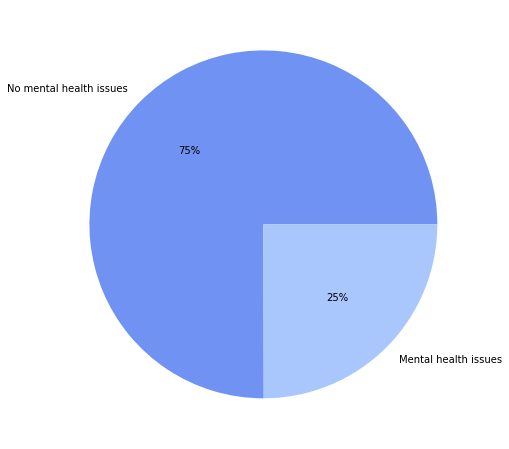

In [11]:
# plot the distribution of mental-health issues
plt.figure(figsize=(8,8))

plt.pie(police_df["signs-of-mental-illness"].value_counts(),
       labels=["No mental health issues","Mental health issues"],
       autopct='%.0f%%',
       colors=sns.color_palette("coolwarm",5));

Many of the stories and news that were broadcast on televisions and social medias are often due to race discrimination, police officers' self defense, or putting a stop to violent acts. However, this information offers an important perspective regarding the killing of people by police officers in the United States. Although 75% does not have mental illness, it raises the question of mental health issues amongst victims of police-caused fatalities. 

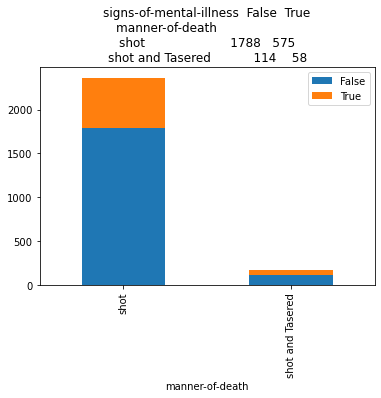

In [12]:
#Analyze how many people that were shot or tasered and shot had mental-health issues
Bivariate = police_df.groupby('manner-of-death')['signs-of-mental-illness'].value_counts().unstack()

ax = Bivariate.plot(kind='bar', stacked='True', title = str(Bivariate.round(1)))
#place legend outside the chart
ax.legend(bbox_to_anchor=(1.0, 1.0))

A large portion of the people that were shot or tasered and shot does not have mental illnesses. This is not surprising as many of the reported cases acted with a clear motive.

<AxesSubplot:>

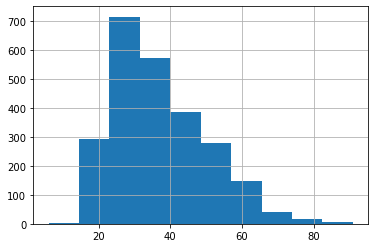

In [13]:
police_df['age'].hist()

This looks like a normal distribution, with a little right skew. This shows that most people that were killed are in the mid 30s, with the median being 34 and mean age of 36.6

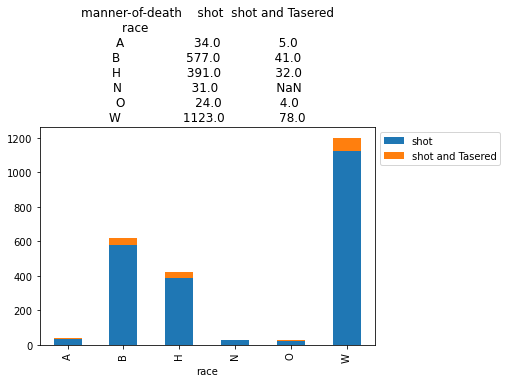

In [14]:
df_raceBivariate = police_df.groupby('race')['manner-of-death'].value_counts().unstack()
ax = df_raceBivariate.plot(kind='bar', stacked='True', title = str(df_raceBivariate.round(1)))
#place legend outside the chart
ax.legend(bbox_to_anchor=(1.0, 1.0))

This diagram shows that majority of the races are shot, instead of both shot and tasered.The proportion seem to be the same across all races, which may indicate that a certain set of behaviors presented by people would result in them being tasered.

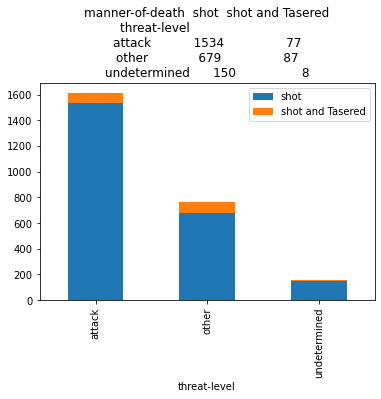

In [15]:
#Analyze the threat level with respect to how they were killed
threat = police_df.groupby('threat-level')['manner-of-death'].value_counts().unstack()

ax = threat.plot(kind='bar', stacked='True', title = str(threat.round(1)))
#place legend outside the chart
ax.legend(bbox_to_anchor=(1.0, 1.0))


This graph further support the hypothesis that a hostile behavior leads to a higher chance of being killed by a police officer. This is indicated through the manner of death shown, where people that are attacking are most often shot before being tasered first. This means that the act of the deceased could cause immediately harm or danger.

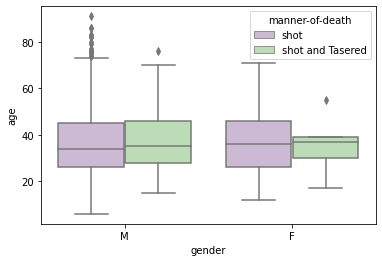

In [16]:
# View the age of people (M & F) who got shot by the police officers
sns.boxplot(x="gender", y="age", hue=police_df['manner-of-death'], data=police_df, palette="PRGn")
plt.show()

This boxplot gives a good indication of the age where people were shot by the police officers. Overall, the age range for males that were being shot is wider than that of females. The age of males that are being shot are generally higher and lower than females. Lets analyze the only outlier in the female category that as being "shot and tasered". 

In [17]:
females = police_df[police_df['gender']=="F"]
female_tasered = females[females['manner-of-death'] =='shot and Tasered']
print(female_tasered[female_tasered['age'] > 40])

males = police_df[police_df['gender']=="M"]
males_shot = males[males['manner-of-death'] =='shot']
print(males_shot[males_shot['age']> 75])

        id            name      date   manner-of-death  armed   age gender  \
2083  2326  Michelle Robey  10/02/17  shot and Tasered  knife  55.0      F   

     race     city state  signs-of-mental-illness threat-level         flee  \
2083    W  Chicago    IL                     True       attack  Not fleeing   

      body-camera  
2083        False  
        id                  name      date manner-of-death       armed   age  \
127    255        Douglas Harris  20/02/15            shot         gun  77.0   
275    357   Richard Dale Weaver  12/04/15            shot     machete  83.0   
315    406         Albert Hanson  26/04/15            shot         gun  76.0   
426    542     Raymond  Phillips  11/06/15            shot         gun  86.0   
518    641      Charles Crandall  14/07/15            shot         gun  76.0   
598    724  Robert Patrick Quinn  09/08/15            shot  toy weapon  77.0   
664    797   Charles Robert Shaw  01/09/15            shot         gun  76.0   
1431

Further analysis shows that the outliers in males are typically not caused by mental illnesses. This could just be a fact that males are more likely to behave in a way (commit crimes or cause harm) that result in them getting shot by the police officers. On the other hand, the only female outliers who was "shot and tasered" clearly had mental-illness. Her being the only outlier in that category made sense because of her mental illness.

<h1>Data cleaning and preparation</h1>

In an ideal scenario, we are expected to receive daatsets that are cleaned and sanitized. However, that is often not the case in real life. Dataset needs to be cleaned in order for us to perform a accurate and fruitful analysis. Data pre-processing includes dropping, manipulating, and combining different variables in order to fit the variables into the selected models for predictions or classifications. 

We will be handling missing values and outliers, and transform some of the variables into more suitable forms for the machine learning algorithm. 

### Removing and renaming columns
Below shows the dataframe after I removed all the columns we will not be using.

In [18]:
police_df.drop(['id','name','body-camera','city','state','date'],axis=1,inplace=True)
police_df.rename(columns={'signs-of-mental-illness': 'mental-illness'},inplace=True)
police_df

,manner-of-death,armed,age,gender,race,mental-illness,threat-level,flee
0,shot,gun,53.0,M,A,True,attack,Not fleeing
1,shot,gun,47.0,M,W,False,attack,Not fleeing
2,shot and Tasered,unarmed,23.0,M,H,False,other,Not fleeing
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing
4,shot,nail gun,39.0,M,H,False,attack,Not fleeing
...,...,...,...,...,...,...,...,...
2530,shot,gun,31.0,M,NaN,False,attack,Not fleeing
2531,shot,vehicle,NaN,M,NaN,False,attack,Car
2532,shot,gun,48.0,M,NaN,False,attack,Car
2533,shot,vehicle,28.0,M,B,False,attack,Car


### Handling missing values 

The student-health-data.csv contains 2535 rows. Columns with less than 2535 non-null values indicates missing or NaN values. This means that all 4 columns has missing values. Since there are only 2535 rows in the dataset, removing any missing or NaN values will significantly reduce the precious amount of data available for any algorithm. 

Therefore, we will replace missing categorical variables with the highest frequency and numerical variables with the mean values. 

In [19]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manner-of-death  2535 non-null   object 
 1   armed            2526 non-null   object 
 2   age              2458 non-null   float64
 3   gender           2535 non-null   object 
 4   race             2340 non-null   object 
 5   mental-illness   2535 non-null   bool   
 6   threat-level     2535 non-null   object 
 7   flee             2470 non-null   object 
dtypes: bool(1), float64(1), object(6)
memory usage: 141.2+ KB


In [20]:
categorical = ['manner-of-death','armed','gender','race','threat-level','flee']
numerical = ['age','mental-illness']
def impute_missing_values(data):
    for column in data:
        if (column in categorical):
            most_frequent_category = data[column].mode()[0]
            data[column] = data[column].fillna(most_frequent_category)
        elif (column in numerical):
            data[column] = data[column].fillna(data[column].median())

        
impute_missing_values(police_df)

Using the most frequent occurrence for categorical variables is a common method for imputing missing values. In a world of large scale data, a sample size of 2535 is considered small. This method works well with small datasets.

For numerical variable such as age, we will replace missing values with median. This is because the dataset has some outliers and median is more robust to outliers, as compared to mean.

In [21]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manner-of-death  2535 non-null   object 
 1   armed            2535 non-null   object 
 2   age              2535 non-null   float64
 3   gender           2535 non-null   object 
 4   race             2535 non-null   object 
 5   mental-illness   2535 non-null   bool   
 6   threat-level     2535 non-null   object 
 7   flee             2535 non-null   object 
dtypes: bool(1), float64(1), object(6)
memory usage: 141.2+ KB


### Format the data

Here, we will standardize some of the variables to ensure consistency of data structure.

In [22]:
police_df['manner-of-death'] = police_df['manner-of-death'].str.lower()
police_df['flee']= police_df['flee'].str.lower()
police_df

,manner-of-death,armed,age,gender,race,mental-illness,threat-level,flee
0,shot,gun,53.0,M,A,True,attack,not fleeing
1,shot,gun,47.0,M,W,False,attack,not fleeing
2,shot and tasered,unarmed,23.0,M,H,False,other,not fleeing
3,shot,toy weapon,32.0,M,W,True,attack,not fleeing
4,shot,nail gun,39.0,M,H,False,attack,not fleeing
...,...,...,...,...,...,...,...,...
2530,shot,gun,31.0,M,W,False,attack,not fleeing
2531,shot,vehicle,34.0,M,W,False,attack,car
2532,shot,gun,48.0,M,W,False,attack,car
2533,shot,vehicle,28.0,M,B,False,attack,car


### Converting categorical variables to numerical for random forest classifier
In order for the random forest classifier to work, we will encode the categorical variables into numerical values pd.get_dummies. This method for conversion is preferred over labelencoder(), pd.factorize and one-hot encoding because labelencoder() and pd.factorize might introduce artificial ordinal relationship between the values. Whereas one-hot encoding may lead to multi-collinearity which is undesirable. Multi-collinearity occurs when there is a high correlation between independent variables, which will affect performance of a classification model. 

In [23]:
new_df = pd.get_dummies(police_df, columns=['armed', 'gender','race','mental-illness','threat-level','flee'])
new_df

,manner-of-death,age,armed_Taser,armed_air conditioner,armed_ax,armed_baseball bat,armed_baseball bat and bottle,armed_baseball bat and fireplace poker,armed_baton,armed_bayonet,...,race_W,mental-illness_False,mental-illness_True,threat-level_attack,threat-level_other,threat-level_undetermined,flee_car,flee_foot,flee_not fleeing,flee_other
0,shot,53.0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,shot,47.0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
2,shot and tasered,23.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,shot,32.0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
4,shot,39.0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,shot,31.0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
2531,shot,34.0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2532,shot,48.0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2533,shot,28.0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


### Handling outliers

From the EDA conducted earlier, the boxplot on age and manner-of-death actually indicated outliers. However, we will not be removing the outliers because of the nature of the dataset. Since mental-illness is a contributor to people being shot at, which happens to be the case for our analysis. Hostile behavior may be attributed to the mental state of a person and that was the argument brought up in the hypothesis. Therefore, we will not be removing the outliers because those are important data points to be included for more accurate analysis.

<h1>Data Analysis</h1>

This section will be used to explore the hypothesis where we will look into the biggest influencing factors affecting the rate of death. We will be training a classfication model with numerical variables, followed by a discussion on findings and improvements to the model

In [24]:
X = new_df.drop('manner-of-death',axis=1)
y = police_df['manner-of-death']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2028, 86)
(507, 86)
(2028,)
(507,)


In [26]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
print(classification_report(y_test, preds))

                  precision    recall  f1-score   support

            shot       0.92      0.97      0.95       466
shot and tasered       0.19      0.07      0.11        41

        accuracy                           0.90       507
       macro avg       0.56      0.52      0.53       507
    weighted avg       0.86      0.90      0.88       507



The classification report shows promising result for the target shot but not for the other. This raises questions pertaining to the distribution of the dataset. Meaning, there are 172 "shot and tasered" as compared to 2363 "shot". This is equivalent to 6.785% of the entire dataset. We will perform a simple resampling to see if the results will improve.

### Resampling

We will be using SMOTE resampling method, known as Synthetic Minority Over-sampling Technique. SMOTE is a type of over-sampling method that is used to correct the imbalances in the groups. This technique creates new data instances of the minority groups by copying existing minority instances and making small changes to them.

In [27]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state = 42)
rf.fit(X,y)
preds = rf.predict(X_test)
print(classification_report(y_test, preds))


                  precision    recall  f1-score   support

            shot       0.92      0.93      0.93       466
shot and tasered       0.14      0.12      0.13        41

        accuracy                           0.87       507
       macro avg       0.53      0.53      0.53       507
    weighted avg       0.86      0.87      0.86       507



Even after resampling, the model's performance in predicting "shot and tasered" is has not improved. In fact, it actually went down a little. In order to understand this issue, we need to understand the reasons for it.

Precision and recall metrics take the classification accuracy one step further and allow us to get a more specific understanding of model evaluation.

The focus of precision is positive predictions. It indicates how many positive predictions are true.

The focus of recall is actual positive classes. It indicates how many of the positive classes the model is able to predict correctly.

F1 score is a more useful measure than accuracy for problems with uneven class distribution because it takes into account both false positive and false negatives.

This model is actually good at predicting cases where people are "shot", but not "shot and tasered". Let me deep dive into the possible reasons by doing further data exploration to see if there is a huge discrepancies between people who are "shot", and "shot and tasered"

# Further analysis

### Analysis on behavior for people that were "shot and tasered"

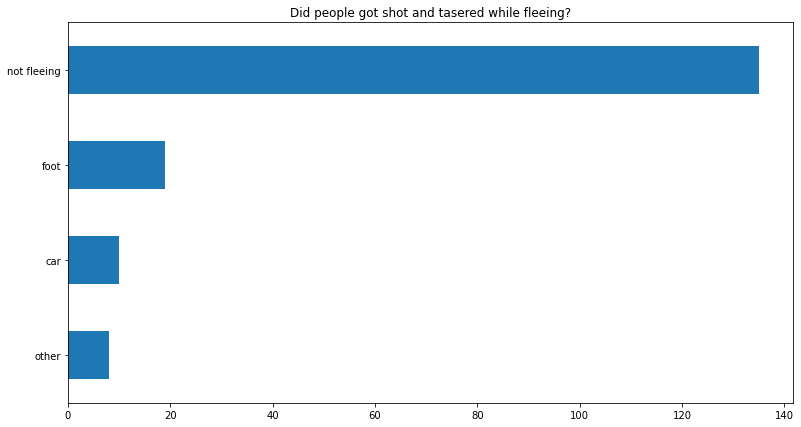

In [28]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot and tasered"]['flee'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Did people got shot and tasered while fleeing?')

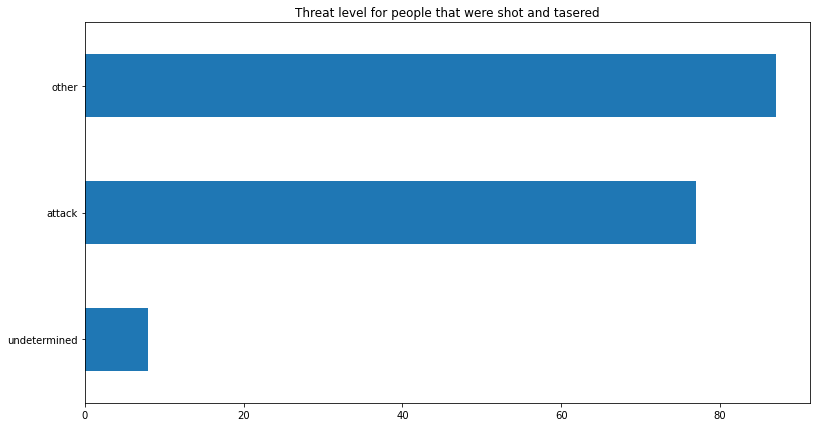

In [29]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot and tasered"]['threat-level'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Threat level for people that were shot and tasered')

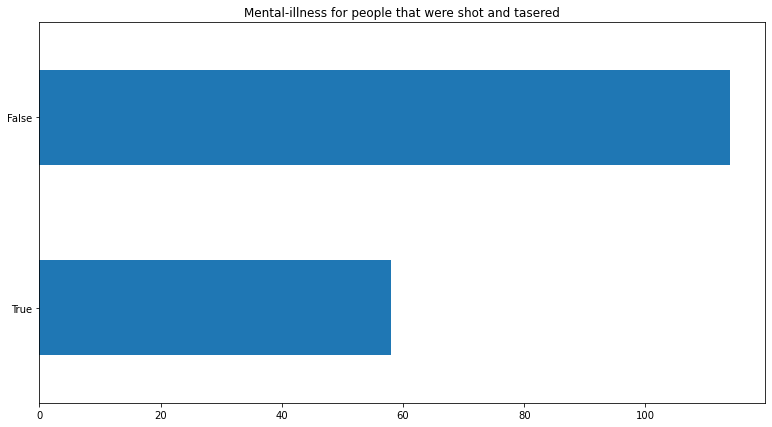

In [30]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot and tasered"]['mental-illness'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Mental-illness for people that were shot and tasered')

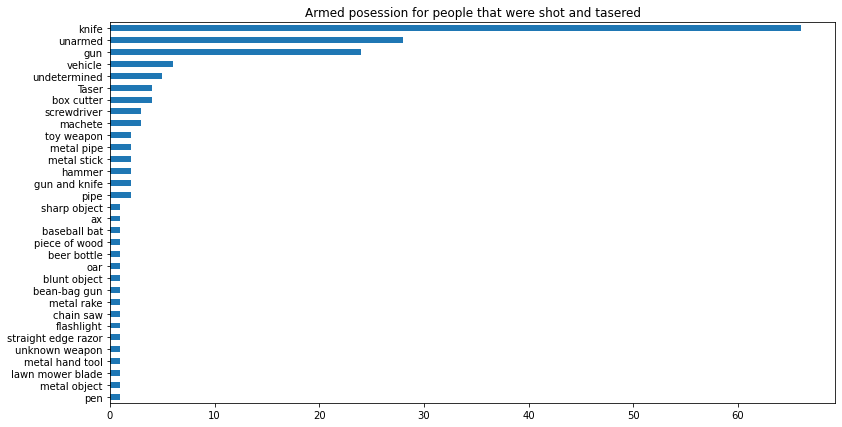

In [31]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot and tasered"]['armed'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Armed posession for people that were shot and tasered')

### Analysis on behavior for people that were "shot"

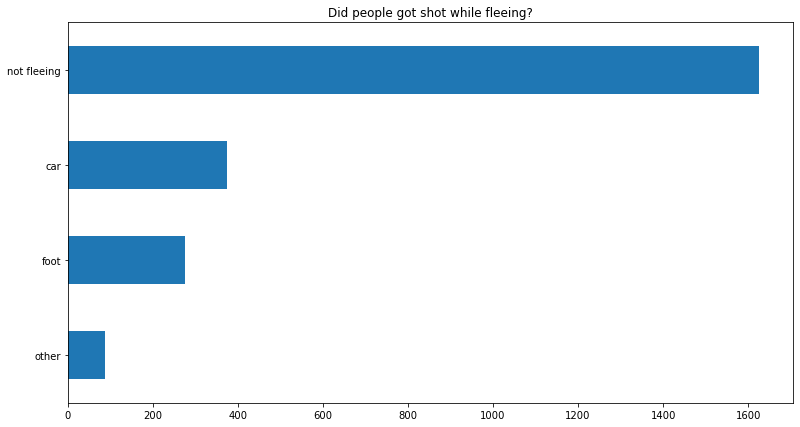

In [32]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot"]['flee'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Did people got shot while fleeing?')

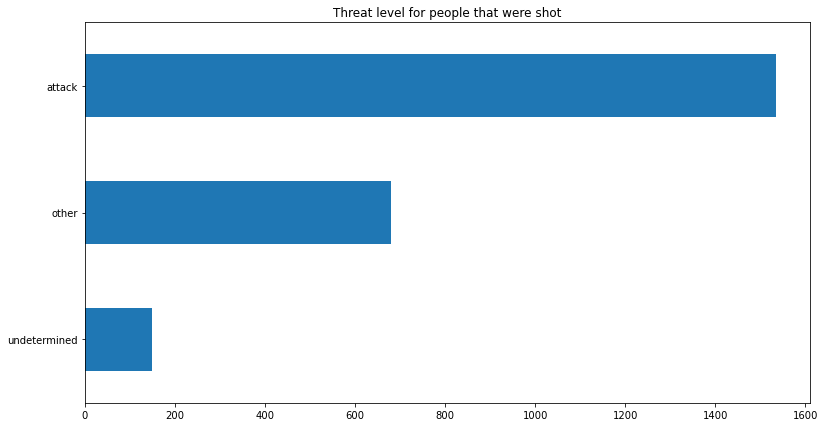

In [33]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot"]['threat-level'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Threat level for people that were shot')

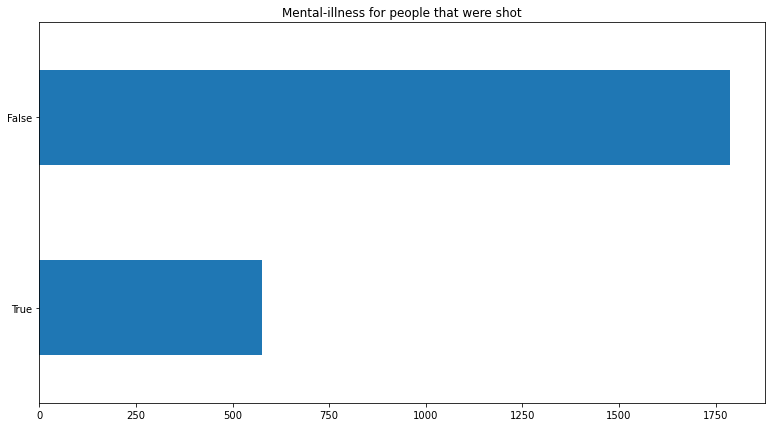

In [34]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot"]['mental-illness'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Mental-illness for people that were shot')

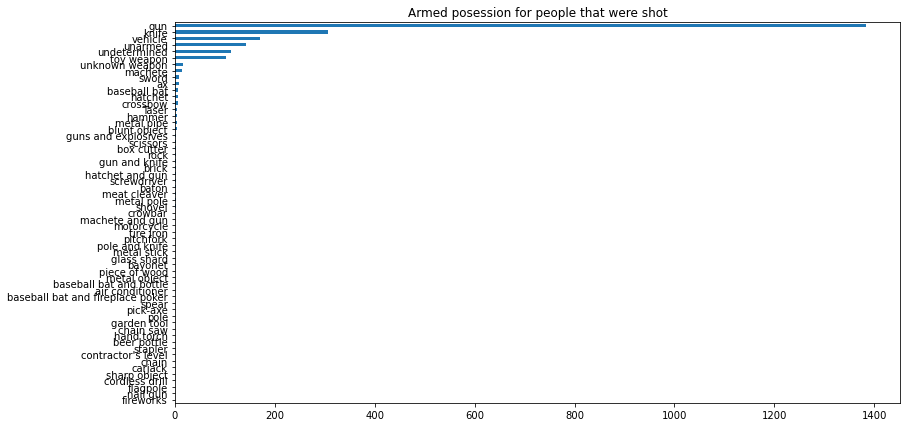

In [35]:
f, ax = plt.subplots(figsize=(13,7))
police_df[police_df['manner-of-death']=="shot"]['armed'].value_counts().plot(kind="barh")
ax.invert_yaxis()
ax.title.set_text('Armed posession for people that were shot')

## Discussion of analysis results

A deeper analysis on the behaviour of people who got shot and tasered shows that majority of them were not fleeing the scene. This data correspond to the information showing that out of 172 people who got shot and tasered, 77 of them (~45%) had high threat level where they attempted to attack someone. 88 of these cases are classified as “other”, which would presumably be some form of danger act. Almost 60%(114 out of 172) of the people in this category does not have mental-illness. And as mentioned in previous exploratory data analysis, an extremely high percentage of people in this category has a knife in possession. Combining with the high threat level, the fact that the deceased was not fleeing at the time of being shot, and the type of weapon in possession (melee weapons like knife), there are strong evidence to support the claim that people generally get tasered before being shot by the police

On the other hand, those that were shot showed that almost 70% (1625 out of 2363) people were not fleeing the scene at the time they were shot. Similarly, 65% (1534 of 2363) of the people were classified as a high threat level, which means that they were in attack mode at the time of shooting (20% more than those that were "shot and tasered"). Majority of the deceased had no mental-illness as well. As mentioned in the EDA earlier,  approximately 60% (1383 of 2363) people were carrying a gun with them at the time of being shot. As a result, combining with the high threat level, the fact that the deceased was not fleeing at the time of being shot, and the type of weapon in possession (melee weapons like knife), it is very likely that a person will be shot at if he/she display such behaviors.

Putting it all together, it seemed that if a person is carrying a long-range armed weapon such as a gun, and exhibit hostile behaviors such as attacking or threatening lives, there is a high chance that he/she will be shot immediately by the police officers. As compared to being tasered, followed by being shot. 

## Revision of hypothesis


After numerous round of analysis, I believe that the hypothesis could be refined more specifically. This is especially so in our case, since all of our data points are people who had already died. The initial hypothesis
- A person would most likely be shot (not tasered and shot) by a police officer in the United States if he/she carries a weapon and exhibit hostile behaviors.

is not suitable because 90% that were shot at was actually found with weapons. A more suitable and revised hypothesis would be 

- A person would most likely be shot immediately (not tasered and shot) by a police officer in the United States if he/she carries a long-range weapon such as guns, while displaying hostile behaviors.

<h1>Conclusion</h1>

After numerous round of analysis, I conclude that there are evidence to support revised hypothesis

- A person would most likely be shot immediately (not tasered and shot) by a police officer in the United States if he/she carries a long-range weapon such as guns, while displaying hostile behaviors.


With regards to the random forest classifer, I believe that it had successfully answered the hypothesis by identifying a pattern in the behaviors of the deceased before they were killed. With a precision of 0.92, recall of 0.94 and F1_score of 0.93, the model were able to capture the correct attribute and behavior that leads to a person being "shot". As to why the evaluation metrics is so low for "shot and tasered", I believe it could be due to the inbalanced class, or the fact that there wasn't any concrete signs of behaviors picked up by the model. I believe there are a lot more opportunities to improve the model.

Finally, I believe that with these insights, much could be done to educate the public. It is unlikely that an act of crime is going to stop in the near future. But more could be done to ensure that people do not get killed during momentary moments when he/she is in a state of confusion, panic or simply if one feels threatened. 

# References

https://www.statista.com/statistics/585152/people-shot-to-death-by-us-police-by-race/

https://www.census.gov/quickfacts/fact/table/US/RHI325220

https://towardsdatascience.com/handling-missing-data-12ac7c59eebc

https://towardsdatascience.com/how-to-handle-smote-data-in-imbalanced-classification-problems-cf4b86e8c6a1